# In questo notebook eseguo analisi di clustering sugli utenti considerando i vettori SVO che ho ottenuto per ciascuno di loro in relazione al medesimo argomento

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [89]:
data = pd.read_csv("svo_covid_user_moresentiment_lessvolume.csv")

In [1]:
#ometto il risultato in quanto apparivano gli id degli utenti, cosa che va contro la politica di Twitter
data

In [92]:
X = data.iloc[:,1:4].values

In [5]:
X

array([[0.385335, 0.3     , 0.028506],
       [0.329435, 0.3     , 0.026675],
       [0.514041, 0.3     , 0.01079 ],
       ...,
       [0.513078, 0.3     , 0.033662],
       [0.422686, 0.3     , 0.041819],
       [0.393812, 0.3     , 0.023192]])

# K-means

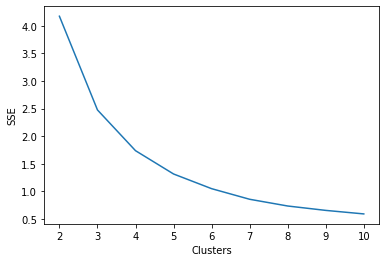

In [6]:
# elbow method
wcss = []
for i in range(2,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(2,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
print(y)

[1 2 3 ... 3 0 1]


In [8]:
data['cluster'] = y

In [2]:
#ometto il risultato in quanto apparivano gli id degli utenti, cosa che va contro la politica di Twitter
data

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]

In [11]:
usersin1=len(data1)
usersin2=len(data2)
usersin3=len(data3)
usersin4=len(data4)
print("Numero di utenti nel primo cluster: ", usersin1)
print("Numero di utenti nel secondo cluster: ", usersin2)
print("Numero di utenti nel terzo cluster: ", usersin3)
print("Numero di utenti nel quarto cluster: ", usersin4)

Numero di utenti nel primo cluster:  1586
Numero di utenti nel secondo cluster:  2345
Numero di utenti nel terzo cluster:  805
Numero di utenti nel quarto cluster:  654


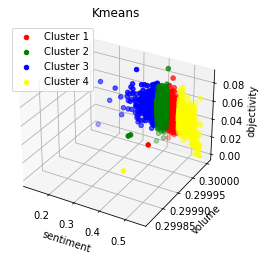

In [12]:
kplot = plt.axes(projection='3d')
xline = np.linspace(-2, -2, 10)
yline = np.linspace(-2, -2, 10)
zline = np.linspace(-2, -2, 10)
# Data for three-dimensional scattered points
kplot.scatter3D(data1.sentiment, data1.volume, data1.objectivity, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.sentiment, data2.volume, data2.objectivity, c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.sentiment, data3.volume, data3.objectivity, c='blue', label='Cluster 3')
kplot.scatter3D(data4.sentiment, data4.volume, data4.objectivity, c='yellow', label='Cluster 4')
kplot.set_xlabel('sentiment')
kplot.set_ylabel('volume')
kplot.set_zlabel('objectivity')
plt.legend()
plt.title("Kmeans")
plt.show()

In [13]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

cluster1_sentiment = data2['sentiment'].mean()
cluster1_volume = data2['volume'].mean()
cluster1_objectivity = data2['objectivity'].mean()

cluster2_sentiment = data3['sentiment'].mean()
cluster2_volume = data3['volume'].mean()
cluster2_objectivity = data3['objectivity'].mean()

cluster3_sentiment = data4['sentiment'].mean()
cluster3_volume = data4['volume'].mean()
cluster3_objectivity = data4['objectivity'].mean()

In [14]:
print("Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))
print("\nPer il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster1_sentiment)+", "+str(cluster1_volume)+", "+str(cluster1_objectivity))
print("\nPer il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster2_sentiment)+", "+str(cluster2_volume)+", "+str(cluster2_objectivity))
print("\nPer il quarto cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster3_sentiment)+", "+str(cluster3_volume)+", "+str(cluster3_objectivity))

Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.42975078184110915, 0.29999993883985643, 0.03863769230769229

Per il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.39279624264392443, 0.2999999095948762, 0.04043747846481876

Per il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.34925371180124276, 0.30000000000000426, 0.04149754161490687

Per il quarto cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4840790076452602, 0.29999970948012494, 0.035374128440366956


# Mean-shift

In [15]:
from sklearn.cluster import MeanShift

In [16]:
X

array([[0.385335, 0.3     , 0.028506],
       [0.329435, 0.3     , 0.026675],
       [0.514041, 0.3     , 0.01079 ],
       ...,
       [0.513078, 0.3     , 0.033662],
       [0.422686, 0.3     , 0.041819],
       [0.393812, 0.3     , 0.023192]])

In [17]:
clustering = MeanShift(bandwidth=2).fit(X)
y = clustering.labels_

In [18]:
data['cluster'] = y

In [3]:
#ometto il risultato in quanto apparivano gli id degli utenti e questo non è concesso dalla politica di Twitter
data

In [23]:
sentiment = data['sentiment'].mean()
volume = data['volume'].mean()
objectivity = data['objectivity'].mean()

In [24]:
print("Per l'unico cluster trovato, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(sentiment)+", "+str(volume)+", "+str(objectivity))

Per l'unico cluster trovato, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4082428270871978, 0.29999990742112176, 0.03945184935064939


# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
clustering_with_dbscan = DBSCAN().fit(X)
y = clustering_with_dbscan.labels_

In [27]:
data['cluster'] = y

In [4]:
#ometto il risultato in quanto apparivano gli id degli utenti e questo non è consentito secondo la politica di Twitter
data

In [29]:
sentiment = data['sentiment'].mean()
volume = data['volume'].mean()
objectivity = data['objectivity'].mean()

In [30]:
print("Per l'unico cluster trovato, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(sentiment)+", "+str(volume)+", "+str(objectivity))

Per l'unico cluster trovato, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4082428270871978, 0.29999990742112176, 0.03945184935064939


# Clustering agglomerativo

2 cluster

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
agglom_clustering = AgglomerativeClustering()
y = agglom_clustering.fit_predict(X)

In [35]:
data['cluster'] = y

In [5]:
#ometto il risultato in quanto apparivano gli id degli utenti e questo va contro la politica di Twitter
data

In [37]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]

In [38]:
usersin1=len(data1)
usersin2=len(data2)
print("Numero di utenti nel primo cluster: ", usersin1)
print("Numero di utenti nel secondo cluster: ", usersin2)

Numero di utenti nel primo cluster:  3659
Numero di utenti nel secondo cluster:  1731


In [39]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

cluster1_sentiment = data2['sentiment'].mean()
cluster1_volume = data2['volume'].mean()
cluster1_objectivity = data2['objectivity'].mean()

In [40]:
print("Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))
print("\nPer il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster1_sentiment)+", "+str(cluster1_volume)+", "+str(cluster1_objectivity))

Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.42803773462694716, 0.29999986362392045, 0.03871635829461598

Per il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.3664002120161763, 0.30000000000000726, 0.04100653552859614


3 cluster

In [41]:
agglom_clustering = AgglomerativeClustering(n_clusters=3)
y = agglom_clustering.fit_predict(X)

In [42]:
data['cluster'] = y

In [6]:
#ometto il risultato in quanto apparivano gli id degli utenti, cosa contraria alla politica di Twitter
data

In [44]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

In [45]:
usersin1=len(data1)
usersin2=len(data2)
usersin3=len(data3)
print("Numero di utenti nel primo cluster: ", usersin1)
print("Numero di utenti nel secondo cluster: ", usersin2)
print("Numero di utenti nel terzo cluster: ", usersin3)

Numero di utenti nel primo cluster:  2926
Numero di utenti nel secondo cluster:  1731
Numero di utenti nel terzo cluster:  733


In [46]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

cluster1_sentiment = data2['sentiment'].mean()
cluster1_volume = data2['volume'].mean()
cluster1_objectivity = data2['objectivity'].mean()

cluster2_sentiment = data3['sentiment'].mean()
cluster2_volume = data3['volume'].mean()
cluster2_objectivity = data3['objectivity'].mean()

In [47]:
print("Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))
print("\nPer il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster1_sentiment)+", "+str(cluster1_volume)+", "+str(cluster1_objectivity))
print("\nPer il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster2_sentiment)+", "+str(cluster2_volume)+", "+str(cluster2_objectivity))

Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.41486745967190686, 0.2999999275461238, 0.03966632604237861

Per il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.3664002120161763, 0.30000000000000726, 0.04100653552859614

Per il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.48061102864938643, 0.2999996084583938, 0.03492426330150065


4 cluster 

In [48]:
agglom_clustering = AgglomerativeClustering(n_clusters=4)
y = agglom_clustering.fit_predict(X)

In [49]:
data['cluster'] = y

In [7]:
#ometto il risultato in quanto apparivano gli id degli utenti e questo non è consentito secondo la politica di Twitter
data

In [51]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]

In [52]:
usersin1=len(data1)
usersin2=len(data2)
usersin3=len(data3)
usersin4=len(data4)
print("Numero di utenti nel primo cluster: ", usersin1)
print("Numero di utenti nel secondo cluster: ", usersin2)
print("Numero di utenti nel terzo cluster: ", usersin3)
print("Numero di utenti nel quarto cluster: ", usersin4)

Numero di utenti nel primo cluster:  1731
Numero di utenti nel secondo cluster:  2090
Numero di utenti nel terzo cluster:  733
Numero di utenti nel quarto cluster:  836


In [53]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

cluster1_sentiment = data2['sentiment'].mean()
cluster1_volume = data2['volume'].mean()
cluster1_objectivity = data2['objectivity'].mean()

cluster2_sentiment = data3['sentiment'].mean()
cluster2_volume = data3['volume'].mean()
cluster2_objectivity = data3['objectivity'].mean()

cluster3_sentiment = data4['sentiment'].mean()
cluster3_volume = data4['volume'].mean()
cluster3_objectivity = data4['objectivity'].mean()

In [54]:
print("Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))
print("\nPer il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster1_sentiment)+", "+str(cluster1_volume)+", "+str(cluster1_objectivity))
print("\nPer il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster2_sentiment)+", "+str(cluster2_volume)+", "+str(cluster2_objectivity))
print("\nPer il quarto cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente: "+str(cluster3_sentiment)+", "+str(cluster3_volume)+", "+str(cluster3_objectivity))

Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.3664002120161763, 0.30000000000000726, 0.04100653552859614

Per il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4060937540669861, 0.2999998985645915, 0.03933438468899518

Per il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.48061102864938643, 0.2999996084583938, 0.03492426330150065

Per il quarto cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente: 0.43680172368421005, 0.30000000000000454, 0.04049617942583729


# Louvain

In [55]:
from sknetwork.clustering import Louvain

In [93]:
louvain = Louvain()
y = louvain.fit_transform(X)

In [94]:
data['cluster'] = y

In [8]:
#ometto il risultato perchè apparivano gli id degli utenti e questo va contro la politica di Twitter
data

In [63]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

In [64]:
usersin1=len(data1)
usersin2=len(data2)
usersin3=len(data3)
print("Numero di utenti nel primo cluster: ", usersin1)
print("Numero di utenti nel secondo cluster: ", usersin2)
print("Numero di utenti nel terzo cluster: ", usersin3)

Numero di utenti nel primo cluster:  2311
Numero di utenti nel secondo cluster:  2060
Numero di utenti nel terzo cluster:  1019


In [65]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

cluster1_sentiment = data2['sentiment'].mean()
cluster1_volume = data2['volume'].mean()
cluster1_objectivity = data2['objectivity'].mean()

cluster2_sentiment = data3['sentiment'].mean()
cluster2_volume = data3['volume'].mean()
cluster2_objectivity = data3['objectivity'].mean()

In [66]:
print("Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))
print("\nPer il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster1_sentiment)+", "+str(cluster1_volume)+", "+str(cluster1_objectivity))
print("\nPer il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster2_sentiment)+", "+str(cluster2_volume)+", "+str(cluster2_objectivity))

Per il primo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.3758883388143673, 0.29999995326697804, 0.038927461272176486

Per il secondo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4469671577669894, 0.29999986067961043, 0.03591851990291257

Per il terzo cluster, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4033351736997049, 0.29999989793916176, 0.04778405691854754


# Propagation

In [67]:
from sknetwork.clustering import PropagationClustering

In [68]:
propagation = PropagationClustering()
y = propagation.fit_transform(X)

In [69]:
data['cluster'] = y

In [9]:
#ometto il risultato in quanto apparivano gli id degli utenti e questo non è consentito dalla politica di Twitter
data

In [74]:
data1 = data[data.cluster==0]

In [75]:
usersin1=len(data1)
print("Numero di utenti nel primo cluster: ", usersin1)

Numero di utenti nel primo cluster:  5390


In [76]:
cluster0_sentiment = data1['sentiment'].mean()
cluster0_volume = data1['volume'].mean()
cluster0_objectivity = data1['objectivity'].mean()

In [77]:
print("Per l'unico cluster ottenuto, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:"+str(cluster0_sentiment)+", "+str(cluster0_volume)+", "+str(cluster0_objectivity))

Per l'unico cluster ottenuto, come valori di sentiment, volume e objectivity abbiamo, rispettivamente:0.4082428270871978, 0.29999990742112176, 0.03945184935064939


In [101]:
data.to_csv('user2cluster_covid.csv')